https://www.kaggle.com/datasets/irvingvasquez/cactus-aerial-photos/data

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files

files.upload()

{}

In [ ]:
!mkdir ~/.kaggle/

In [ ]:
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d irvingvasquez/cactus-aerial-photos

 78% 41.0M/52.7M [00:00<00:00, 106MB/s] 
100% 52.7M/52.7M [00:00<00:00, 109MB/s]


In [ ]:
!unzip cactus-aerial-photos.zip

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image

<h3> Basic Workflow

- persiapan dataset
- bangun arsitektur
- persiapan training (optimizer, loss/criterion, metrics (OLM))
- training loop
- evaluasi

<h1> Siapkan Dataset

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '/content/training_set/training_set'
test_dir = '/content/validation_set/validation_set'

train_datagen = ImageDataGenerator (
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode = 'nearest'
)

test_datagen = ImageDataGenerator (
    rescale = 1./255
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    directory = train_dir,
    target_size = (150, 150),
    class_mode = "binary",
    batch_size = 32,
)

Found 17500 images belonging to 2 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(
    directory = test_dir,
    target_size = (150, 150),
    class_mode = "binary",
    batch_size = 32,
)

Found 4000 images belonging to 2 classes.


<h1> Transfer Learning

In [ ]:
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet152V2

In [ ]:
model = tf.keras.models.Sequential([
    ResNet152V2(weights="imagenet", include_top=False, input_tensor=Input(shape=(150, 150, 3))),
    # tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.layers[0].trainable

True

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=tf.keras.metrics.BinaryAccuracy() # karena sigmoid maka metric yg dipakai binary accuracy
)

In [ ]:
history = model.fit(train_generator,
                              validation_data=test_generator,
                              epochs=2,
                              verbose=2)

Epoch 1/2
547/547 - 390s - loss: 0.4366 - binary_accuracy: 0.8129 - val_loss: 0.2743 - val_binary_accuracy: 0.9007 - 390s/epoch - 713ms/step
Epoch 2/2
547/547 - 260s - loss: 0.5421 - binary_accuracy: 0.9251 - val_loss: 1.1760 - val_binary_accuracy: 0.7505 - 260s/epoch - 476ms/step


<h1> Style Transfer

In [ ]:
import PIL

In [ ]:
def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

In [ ]:
def image_to_tensor(path_to_img):
    img = tf.io.read_file(path_to_img)
    img = tf.image.decode_image(img, channels=3, dtype=tf.float32)

    # Resize the image to specific dimensions
    img = tf.image.resize(img, [512, 512])
    img = img[tf.newaxis, :]
    return img

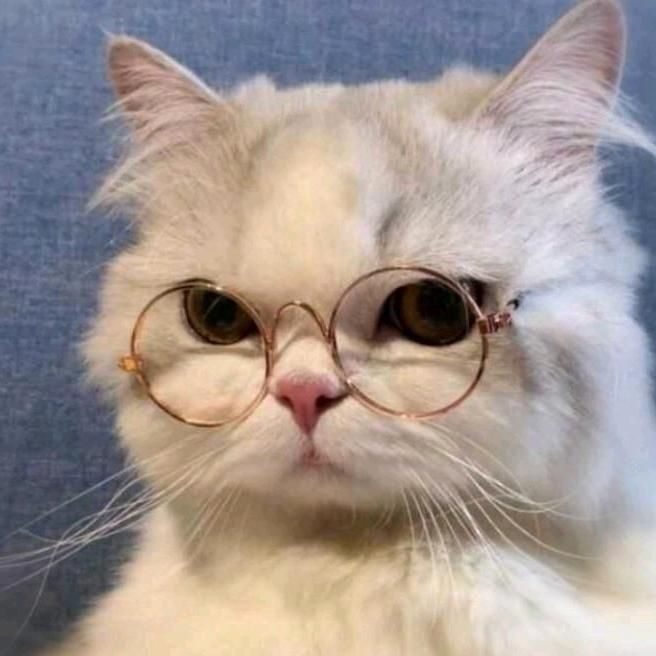

In [ ]:
PIL.Image.open("/content/kucing.jpeg")

In [ ]:
PIL.Image.open("/content/style.jpg")

In [ ]:
kucing_tensor = image_to_tensor('/content/kucing.jpeg')
kucing_tensor

<tf.Tensor: shape=(1, 512, 512, 3), dtype=float32, numpy=
array([[[[0.47506133, 0.52996325, 0.63192403],
         [0.48511034, 0.5400123 , 0.6419731 ],
         [0.48964465, 0.5445466 , 0.6465074 ],
         ...,
         [0.4082922 , 0.5024098 , 0.61221373],
         [0.4109806 , 0.5050983 , 0.6149022 ],
         [0.41121328, 0.5053309 , 0.61513484]],

        [[0.47145855, 0.5263605 , 0.6283213 ],
         [0.48008582, 0.5349878 , 0.6369486 ],
         [0.48462012, 0.5395221 , 0.6414829 ],
         ...,
         [0.4022672 , 0.4947304 , 0.60949755],
         [0.4035779 , 0.49604115, 0.6108083 ],
         [0.40453434, 0.49699757, 0.6117647 ]],

        [[0.4683824 , 0.5232843 , 0.6252451 ],
         [0.47506133, 0.52996325, 0.63192403],
         [0.47765687, 0.5325588 , 0.6345196 ],
         ...,
         [0.40000004, 0.4901961 , 0.6117647 ],
         [0.40000004, 0.4901961 , 0.6117647 ],
         [0.40000004, 0.4901961 , 0.6117647 ]],

        ...,

        [[0.2851103 , 0.28903186, 

In [ ]:
style_tensor = image_to_tensor('/content/style.jpg')
style_tensor

<tf.Tensor: shape=(1, 512, 512, 3), dtype=float32, numpy=
array([[[[0.01546631, 0.09996386, 0.39041236],
         [0.18323271, 0.30712315, 0.5902016 ],
         [0.02317972, 0.0825309 , 0.28005338],
         ...,
         [0.7617869 , 0.71836084, 0.24946578],
         [0.77773994, 0.75668126, 0.31042984],
         [0.9243398 , 0.88202757, 0.3961043 ]],

        [[0.02822015, 0.15393116, 0.37739822],
         [0.15329926, 0.3282489 , 0.5861984 ],
         [0.1847204 , 0.2931916 , 0.4958877 ],
         ...,
         [0.7535238 , 0.7745983 , 0.29952392],
         [0.7509688 , 0.7583931 , 0.31479707],
         [0.9335834 , 0.91809505, 0.3947145 ]],

        [[0.05885417, 0.23115535, 0.4339375 ],
         [0.37112597, 0.55546016, 0.8201079 ],
         [0.10529068, 0.2202504 , 0.45179015],
         ...,
         [0.7133813 , 0.8015794 , 0.43825436],
         [0.6960113 , 0.72638726, 0.30616936],
         [0.7933208 , 0.776231  , 0.2626069 ]],

        ...,

        [[0.10282043, 0.06084739, 

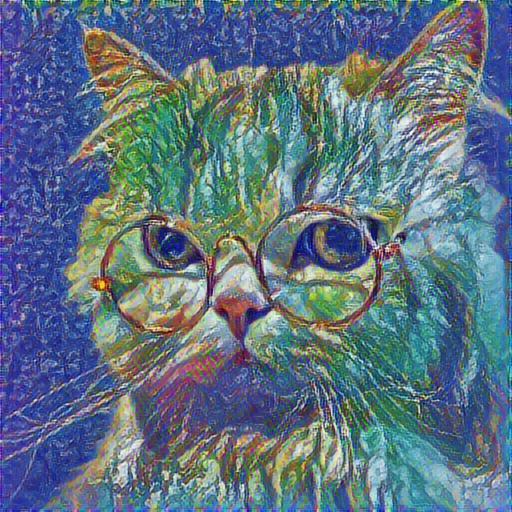

In [ ]:
import tensorflow_hub as hub
import numpy as np
import PIL.Image
import time
import functools
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/1')
stylized_image = hub_module(tf.constant(kucing_tensor), tf.constant(style_tensor))[0]
tensor_to_image(stylized_image)

<h1> Multi Layer Perceptron

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32)),
    tf.keras.layers.Dense(units=512, activation="relu"),
    tf.keras.layers.Dense(units=256, activation="relu"),
    tf.keras.layers.Dense(units=128, activation="relu"),
    tf.keras.layers.Dense(units=64, activation="relu"),
    tf.keras.layers.Dense(units=1, activation="sigmoid")
])

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=tf.keras.metrics.BinaryAccuracy() # karena sigmoid maka metric yg dipakai binary accuracy
)

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 1024)              0         
                                                                 
 dense_27 (Dense)            (None, 512)               524800    
                                                                 
 dense_28 (Dense)            (None, 256)               131328    
                                                                 
 dense_29 (Dense)            (None, 128)               32896     
                                                                 
 dense_30 (Dense)            (None, 64)                8256      
                                                                 
 dense_31 (Dense)            (None, 1)                 65        
                                                                 
Total params: 697345 (2.66 MB)
Trainable params: 69734

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('binary_accuracy')>0.9):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
History = model.fit(
        train_generator,
        validation_data=test_generator,
        batch_size = 128,
        epochs = 20,
        verbose = 1,
        callbacks=[callbacks]
)

Epoch 1/20
547/547 [==============================] - 23s 42ms/step - loss: 0.4384 - binary_accuracy: 0.7825 - val_loss: 0.4082 - val_binary_accuracy: 0.8043
Epoch 2/20
547/547 [==============================] - 23s 43ms/step - loss: 0.4332 - binary_accuracy: 0.7818 - val_loss: 0.4036 - val_binary_accuracy: 0.8065
Epoch 3/20
547/547 [==============================] - 22s 40ms/step - loss: 0.4290 - binary_accuracy: 0.7805 - val_loss: 0.4247 - val_binary_accuracy: 0.8270
Epoch 4/20
547/547 [==============================] - 24s 43ms/step - loss: 0.4240 - binary_accuracy: 0.7875 - val_loss: 0.4152 - val_binary_accuracy: 0.8008
Epoch 5/20
547/547 [==============================] - 25s 46ms/step - loss: 0.4231 - binary_accuracy: 0.7903 - val_loss: 0.4126 - val_binary_accuracy: 0.7985
Epoch 6/20
547/547 [==============================] - 23s 42ms/step - loss: 0.4162 - binary_accuracy: 0.7932 - val_loss: 0.4475 - val_binary_accuracy: 0.7560
Epoch 7/20
547/547 [==============================] 

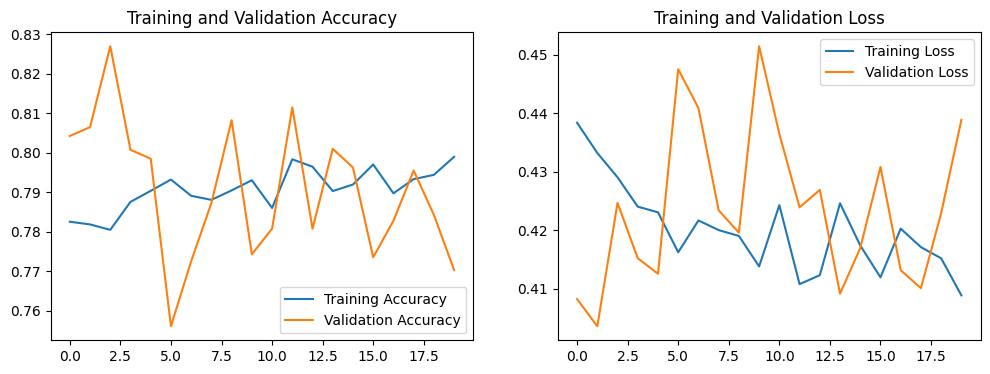

In [ ]:
# Plot akurasi
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(History.history['binary_accuracy'], label='Training Accuracy')
plt.plot(History.history['val_binary_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(History.history['loss'], label='Training Loss')
plt.plot(History.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

<h1> Convolutional Neural Network

In [ ]:
cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(32, 32, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation="relu"),
    tf.keras.layers.Dense(units=1, activation="sigmoid")
])

In [ ]:
cnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=tf.keras.metrics.BinaryAccuracy()
)

In [ ]:
cnn.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 2, 2, 128)        

In [ ]:
History = cnn.fit(
        train_generator,
        validation_data=test_generator,
        batch_size = 128,
        epochs = 20,
        verbose = 1,
        callbacks=[callbacks]
)

Epoch 1/20
547/547 [==============================] - 40s 70ms/step - loss: 0.2645 - binary_accuracy: 0.8895 - val_loss: 0.2239 - val_binary_accuracy: 0.9125
Epoch 2/20
547/547 [==============================] - ETA: 0s - loss: 0.1514 - binary_accuracy: 0.9418
Akurasi telah mencapai >90%!
547/547 [==============================] - 36s 66ms/step - loss: 0.1514 - binary_accuracy: 0.9418 - val_loss: 0.1423 - val_binary_accuracy: 0.9425
